In [11]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/jamesrodriguez10_2019-11-22.csv')

In [36]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['created_time'])
df['y'] = data['likes']

In [5]:
cap = 800000
floor = 0
df['cap'] = cap
df['floor'] = floor

In [6]:
df.head()

,ds,y,cap,floor
0,2019-11-22 18:05:42,59449,800000,0
1,2019-11-13 01:13:54,747591,800000,0
2,2019-11-10 18:58:31,1165412,800000,0
3,2019-11-08 21:46:35,2068819,800000,0
4,2019-10-28 18:41:24,1883822,800000,0


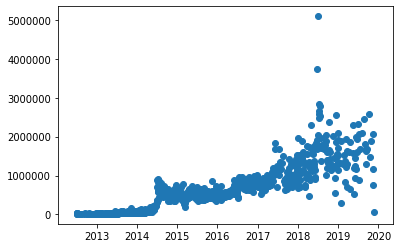

In [7]:
plt.scatter(x=df.ds, y=df.y)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


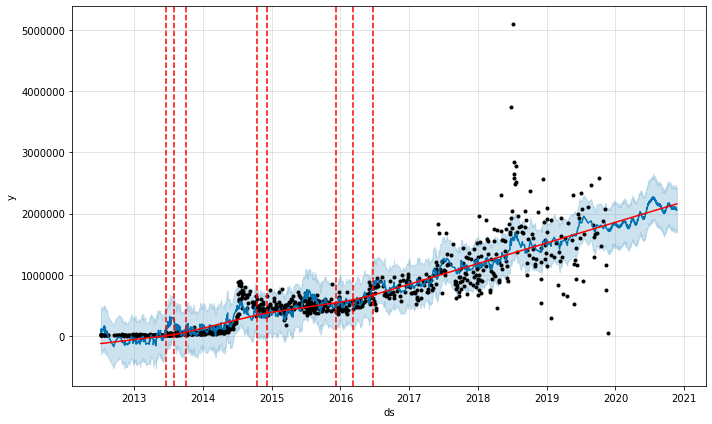

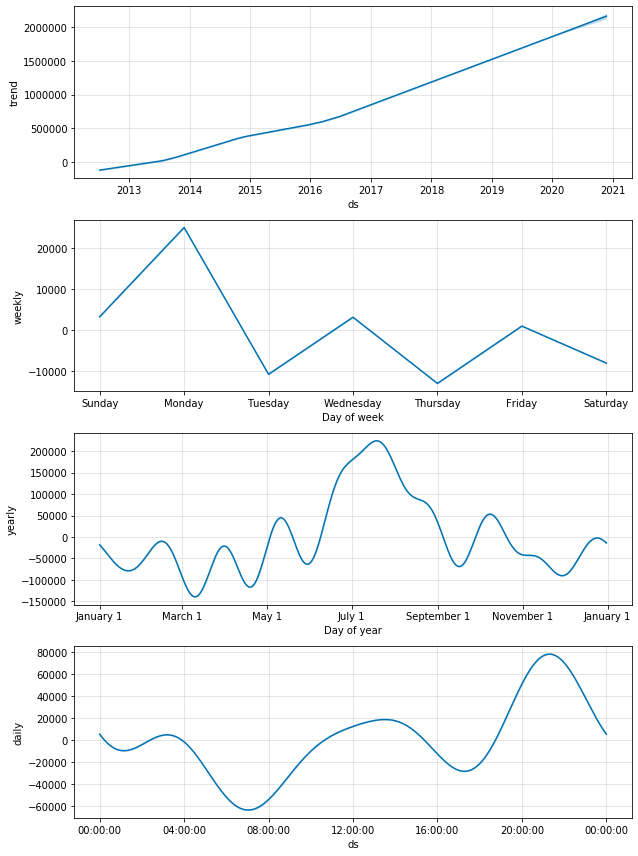

INFO:fbprophet:Making 9 forecasts with cutoffs between 2014-12-13 18:05:42 and 2018-11-22 18:05:42


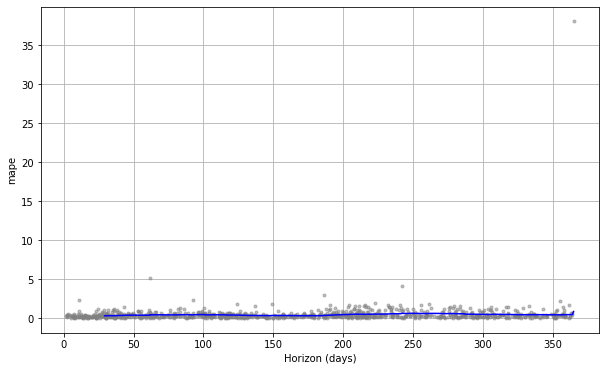

mape: 41.84%


In [8]:
prophet = Prophet()
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='730 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

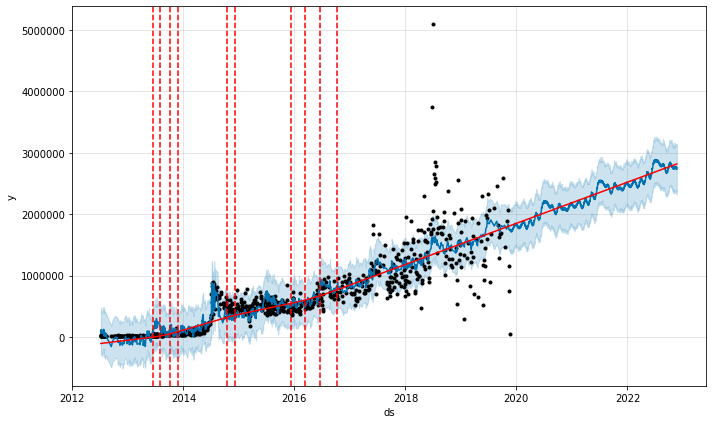

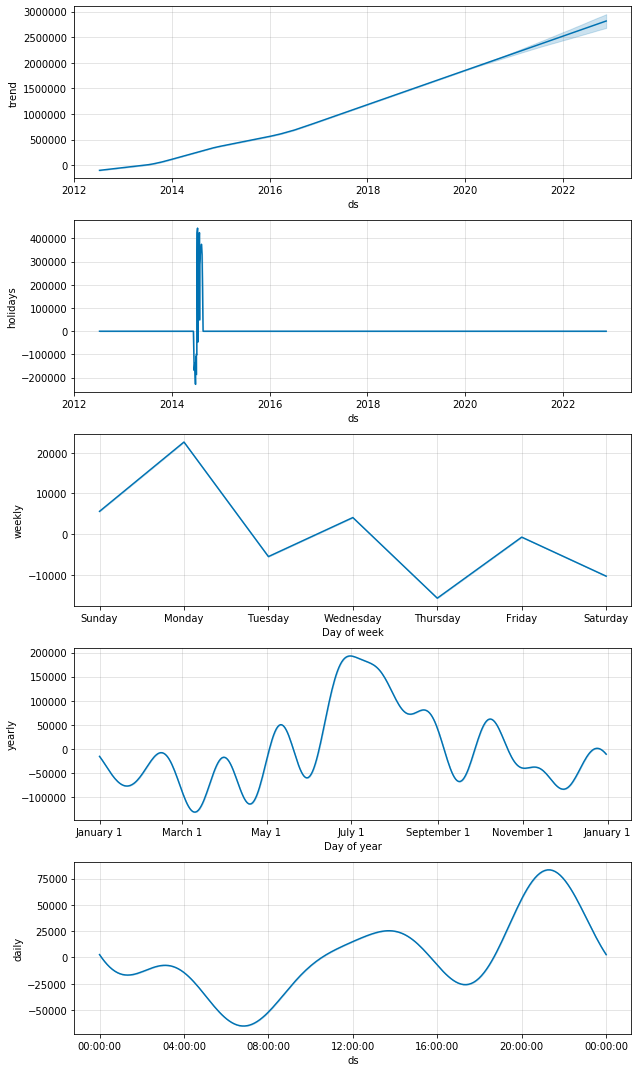

INFO:fbprophet:Making 9 forecasts with cutoffs between 2014-12-13 18:05:42 and 2018-11-22 18:05:42


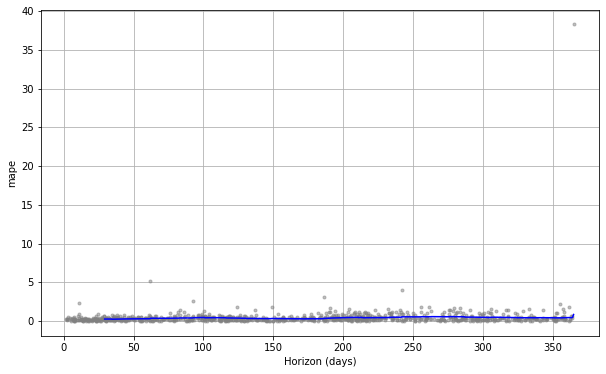

mape: 39.98%


In [9]:
prophet = Prophet(growth='linear',
                  n_changepoints=25,
                  changepoint_range=0.8,
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  holidays=pd.DataFrame({'holiday': "World Cup goal",
                                         'ds' : pd.to_datetime(['2014-06-28']),
                                         'lower_window': -15,
                                         'upper_window': 50}),
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.05,
                  mcmc_samples=0)
prophet.fit(df)
future = prophet.make_future_dataframe(periods=1095, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='730 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

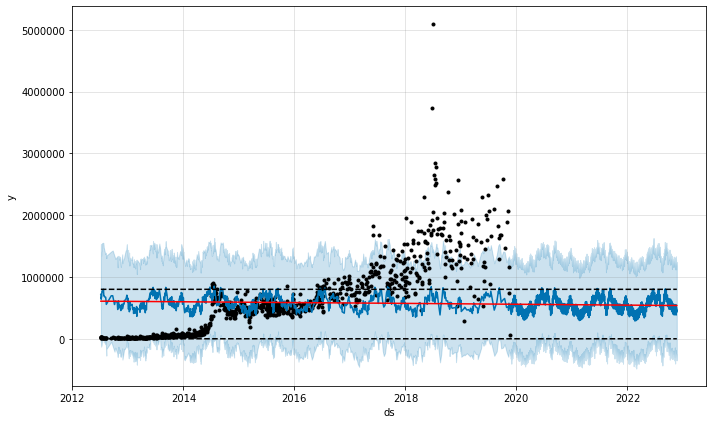

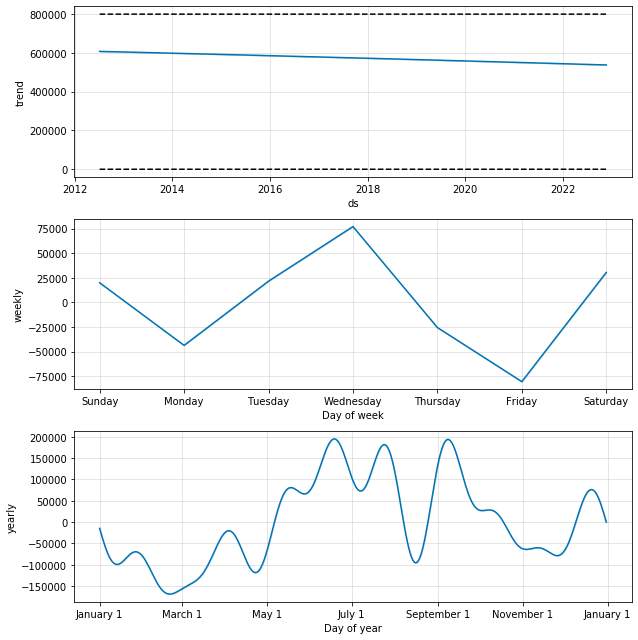

INFO:fbprophet:Making 3 forecasts with cutoffs between 2015-11-28 18:05:42 and 2016-11-22 18:05:42


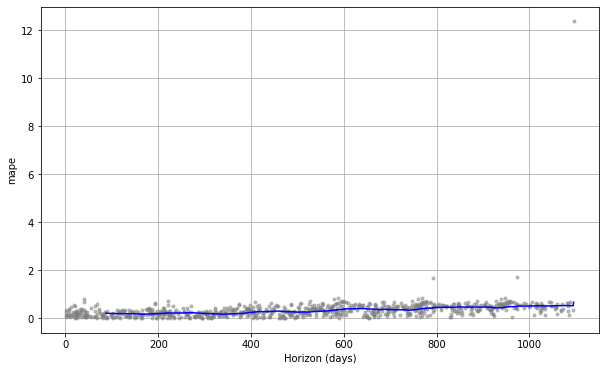

mape: 31.46%


In [10]:
prophet = Prophet(growth='logistic',
                  n_changepoints=25,
                  changepoint_range=0.95,
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=False,
                  holidays=None,
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.01,
                  mcmc_samples=0)
prophet.fit(df)
future = prophet.make_future_dataframe(periods=1095, freq='D')
future['cap'] = cap
future['floor'] = floor
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '1095 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

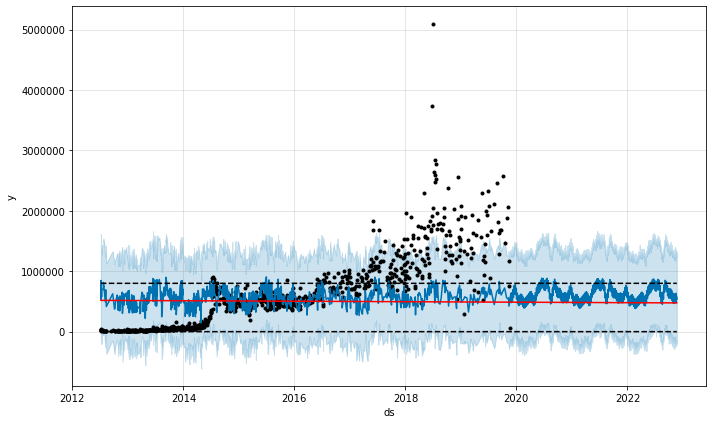

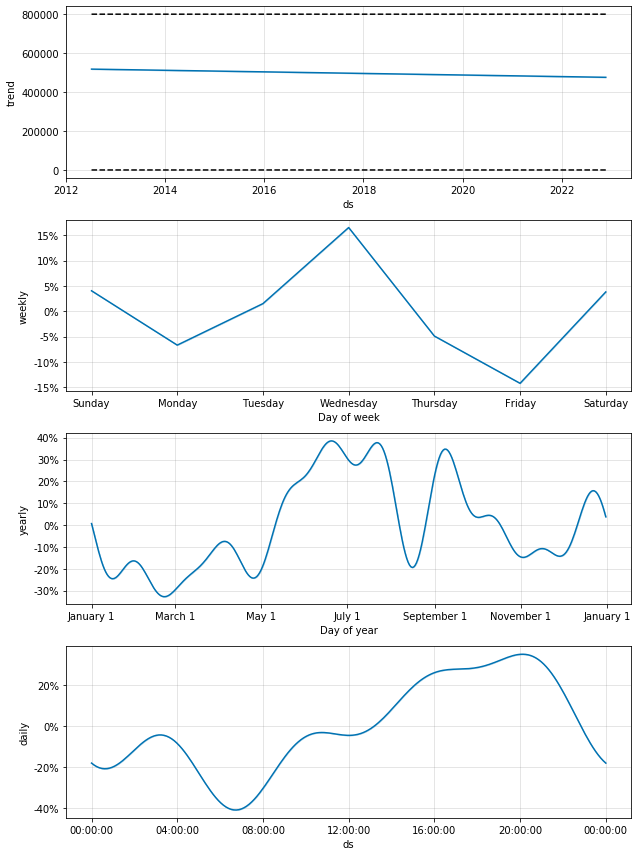

INFO:fbprophet:Making 3 forecasts with cutoffs between 2015-11-28 18:05:42 and 2016-11-22 18:05:42


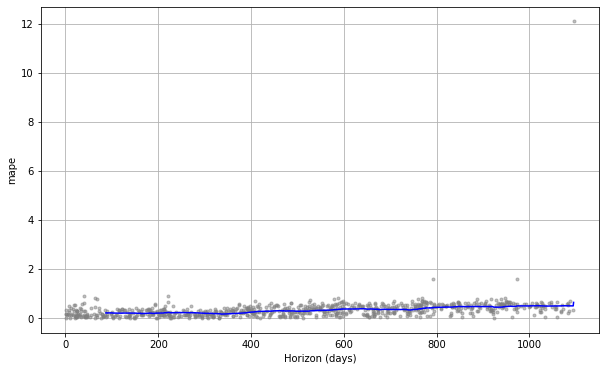

mape: 32.05%


In [11]:
prophet = Prophet(growth='logistic',
                  n_changepoints=25,
                  changepoint_range=0.95,
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
                  holidays=None,
                  seasonality_mode='multiplicative',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.01,
                  mcmc_samples=0)
prophet.fit(df)
future = prophet.make_future_dataframe(periods=1095, freq='D')
future['cap'] = cap
future['floor'] = floor
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '1095 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

In [4]:
# dataframe of World Cup events 

wc_2014 = pd.DataFrame({'holiday': "World Cup 2014",
                      'ds' : pd.to_datetime(['2014-06-12']),
                      'lower_window': 0,
                      'upper_window': 40})
wc_2018 = pd.DataFrame({'holiday': "World Cup 2018",
                      'ds' : pd.to_datetime(['2018-06-14']),
                      'lower_window': 0,
                      'upper_window': 40})

world_cup = pd.concat([wc_2014, wc_2018])

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


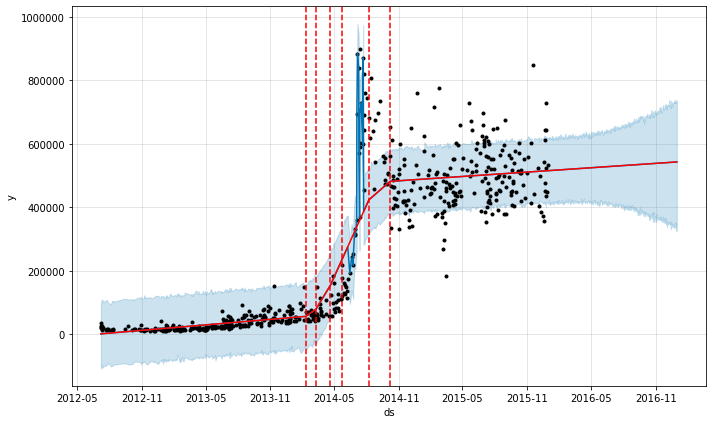

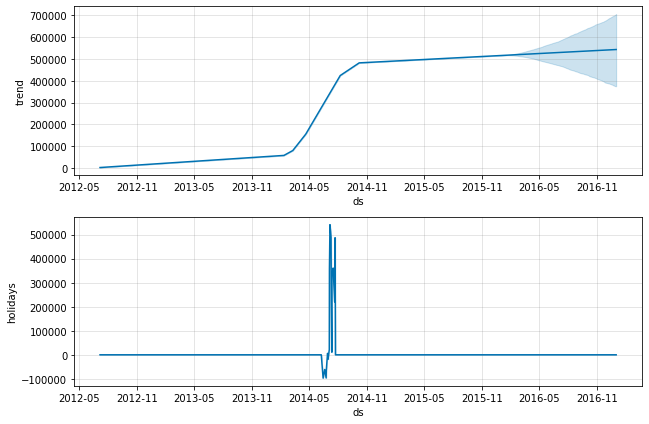

In [5]:
prophet = Prophet(yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                  holidays=world_cup,
                  changepoint_prior_scale=.1)
prophet.fit(df)
future = prophet.make_future_dataframe(periods=365, freq='D')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [37]:
df['during_world_cup_2014'] = 0
df.loc[(df['ds'] >= pd.to_datetime('2014-05-02')) & (df['ds'] <= pd.to_datetime('2014-08-25')), 'during_world_cup_2014'] = 1
df['after_world_cup_2014'] = 0
df.loc[(df['ds'] >= pd.to_datetime('2014-08-25')), 'after_world_cup_2014'] = 1

df['during_world_cup_2018'] = 0
df.loc[(df['ds'] >= pd.to_datetime('2018-06-04')) & (df['ds'] <= pd.to_datetime('2018-07-03')), 'during_world_cup_2018'] = 1
df['after_world_cup_2018'] = 0
df.loc[(df['ds'] >= pd.to_datetime('2018-07-03')), 'after_world_cup_2018'] = 1

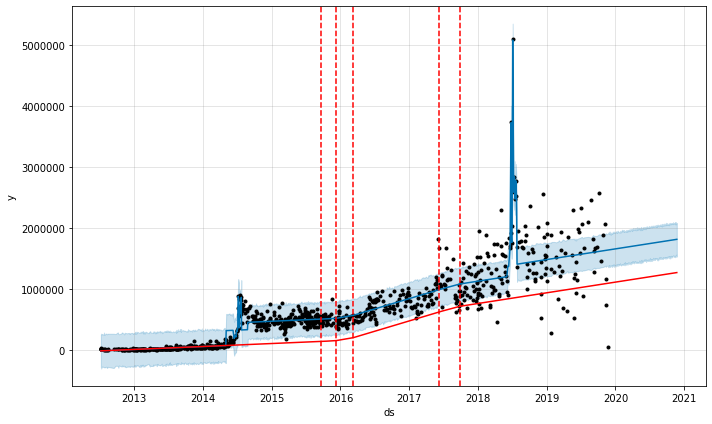

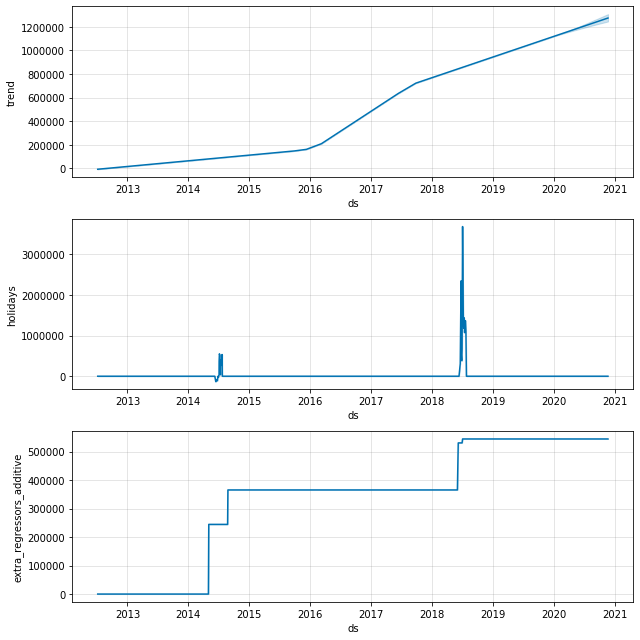

In [38]:
prophet = Prophet(yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                  holidays=world_cup,
                  changepoint_prior_scale=.1)

prophet.add_regressor('during_world_cup_2014', mode='additive')
prophet.add_regressor('after_world_cup_2014', mode='additive')
prophet.add_regressor('during_world_cup_2018', mode='additive')
prophet.add_regressor('after_world_cup_2018', mode='additive')

prophet.fit(df)
future = prophet.make_future_dataframe(periods=365)

future['during_world_cup_2014'] = 0
future.loc[(future['ds'] >= pd.to_datetime('2014-05-02')) & (future['ds'] <= pd.to_datetime('2014-08-25')), 'during_world_cup_2014'] = 1
future['after_world_cup_2014'] = 0
future.loc[(future['ds'] >= pd.to_datetime('2014-08-25')), 'after_world_cup_2014'] = 1

future['during_world_cup_2018'] = 0
future.loc[(future['ds'] >= pd.to_datetime('2018-06-04')) & (future['ds'] <= pd.to_datetime('2018-07-03')), 'during_world_cup_2018'] = 1
future['after_world_cup_2018'] = 0
future.loc[(future['ds'] >= pd.to_datetime('2018-07-03')), 'after_world_cup_2018'] = 1

forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [44]:
start_2014 = pd.to_datetime('2014-05-02')
end_2014 = pd.to_datetime('2014-08-25')
days_2014 = df['ds'].between(left=start_2014, right=end_2014).sum()

df['during_world_cup_2014'] = 0
df.loc[(df['ds'] >= start_2014) & (df['ds'] <= end_2014), 'during_world_cup_2014'] = np.linspace(0, 1, days_2014)
df['after_world_cup_2014'] = 0
df.loc[(df['ds'] >= end_2014), 'after_world_cup_2014'] = 1

start_2018 = pd.to_datetime('2018-06-04')
end_2018 = pd.to_datetime('2018-07-03')
days_2018 = df['ds'].between(left=start_2018, right=end_2018).sum()

df['during_world_cup_2018'] = 0
df.loc[(df['ds'] >= start_2018) & (df['ds'] <= end_2018), 'during_world_cup_2018'] = np.linspace(0, 1, days_2018)
df['after_world_cup_2018'] = 0
df.loc[(df['ds'] >= end_2018), 'after_world_cup_2018'] = 1

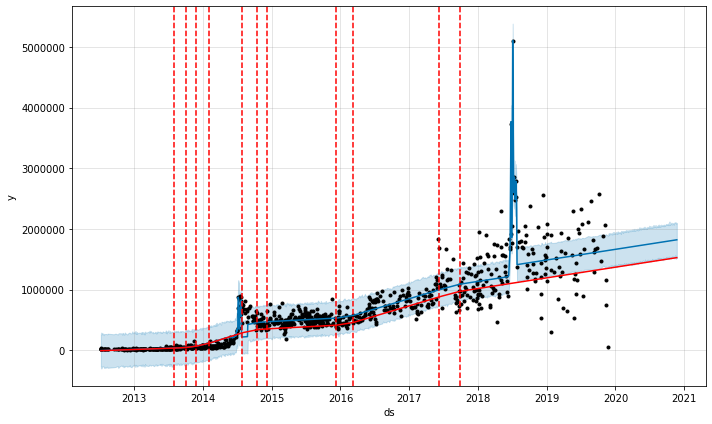

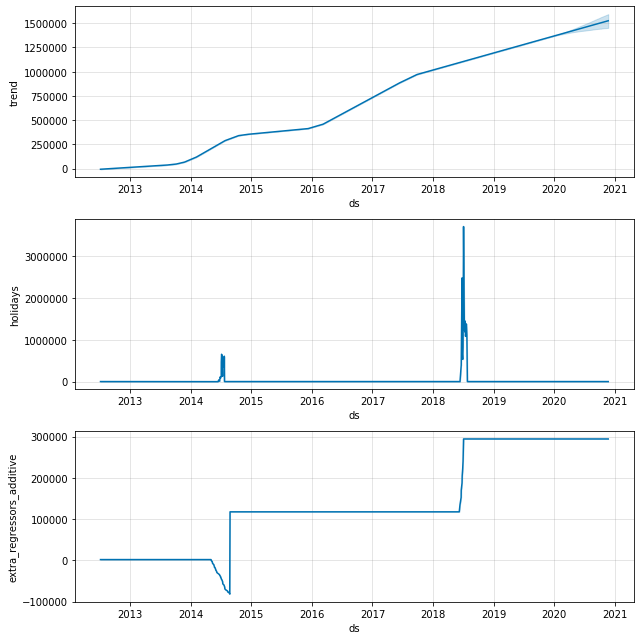

In [47]:
prophet = Prophet(yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                  holidays=world_cup,
                  changepoint_prior_scale=.1)

prophet.add_regressor('during_world_cup_2014', mode='additive')
prophet.add_regressor('after_world_cup_2014', mode='additive')
prophet.add_regressor('during_world_cup_2018', mode='additive')
prophet.add_regressor('after_world_cup_2018', mode='additive')

prophet.fit(df)
future = prophet.make_future_dataframe(periods=365)

future['during_world_cup_2014'] = 0
future.loc[(future['ds'] >= start_2014) & (future['ds'] <= end_2014), 'during_world_cup_2014'] = np.linspace(0, 1, days_2014)
future['after_world_cup_2014'] = 0
future.loc[(future['ds'] >= end_2014), 'after_world_cup_2014'] = 1

future['during_world_cup_2018'] = 0
future.loc[(future['ds'] >= start_2018) & (future['ds'] <= end_2018), 'during_world_cup_2018'] = np.linspace(0, 1, days_2018)
future['after_world_cup_2018'] = 0
future.loc[(future['ds'] >= end_2018), 'after_world_cup_2018'] = 1

forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()